In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["figure.dpi"] = 300
plt.rcParams["text.latex.preamble"] = r"\usepackage{bm}"
plt.rcParams["text.usetex"] = True

In [8]:
# Fields
ey = 0.8
bz = 1

vx_drift = ey / bz
gamma_drift = 1 / np.sqrt(1 - vx_drift**2)

# Initial conditions
ux_init = 20.0
gamma_init = np.sqrt(1 + ux_init**2)

# In drift frame
ux_init_prime = gamma_drift * (ux_init - vx_drift * gamma_init)
gamma_init_prime = np.sqrt(1 + ux_init_prime**2)
phases_prime = np.linspace(0, 2 * np.pi, 100)
ux_th_prime = ux_init_prime * np.cos(phases_prime)
uy_th_prime = ux_init_prime * np.sin(phases_prime)

# Back to lab frame
ux_th = gamma_drift * (ux_th_prime + vx_drift * gamma_init_prime)
uy_th = uy_th_prime

# Steps
u_init = np.array([ux_init, 0, 0])
e = np.array([0, ey, 0])
b = np.array([0, 0, bz])

dt = 15.0

u_e = u_init + (dt / 2) * e
gamma_e = np.sqrt(1 + np.linalg.norm(u_e) ** 2)

u1 = u_e + (dt / 2) * np.cross(u_e, b) / gamma_e
u2 = (
    u_e
    + dt
    / (1 + (dt / 2) ** 2 * np.linalg.norm(b) ** 2 / gamma_e**2)
    * np.cross(u1, b)
    / gamma_e
)

uf = u2 + (dt / 2) * e

Text(0.5, 1.0, '$\\Delta t = 15.0$, $\\bm{B}=\\hat{\\bm{z}}$, $\\bm{E}=0.1\\hat{\\bm{y}}$')

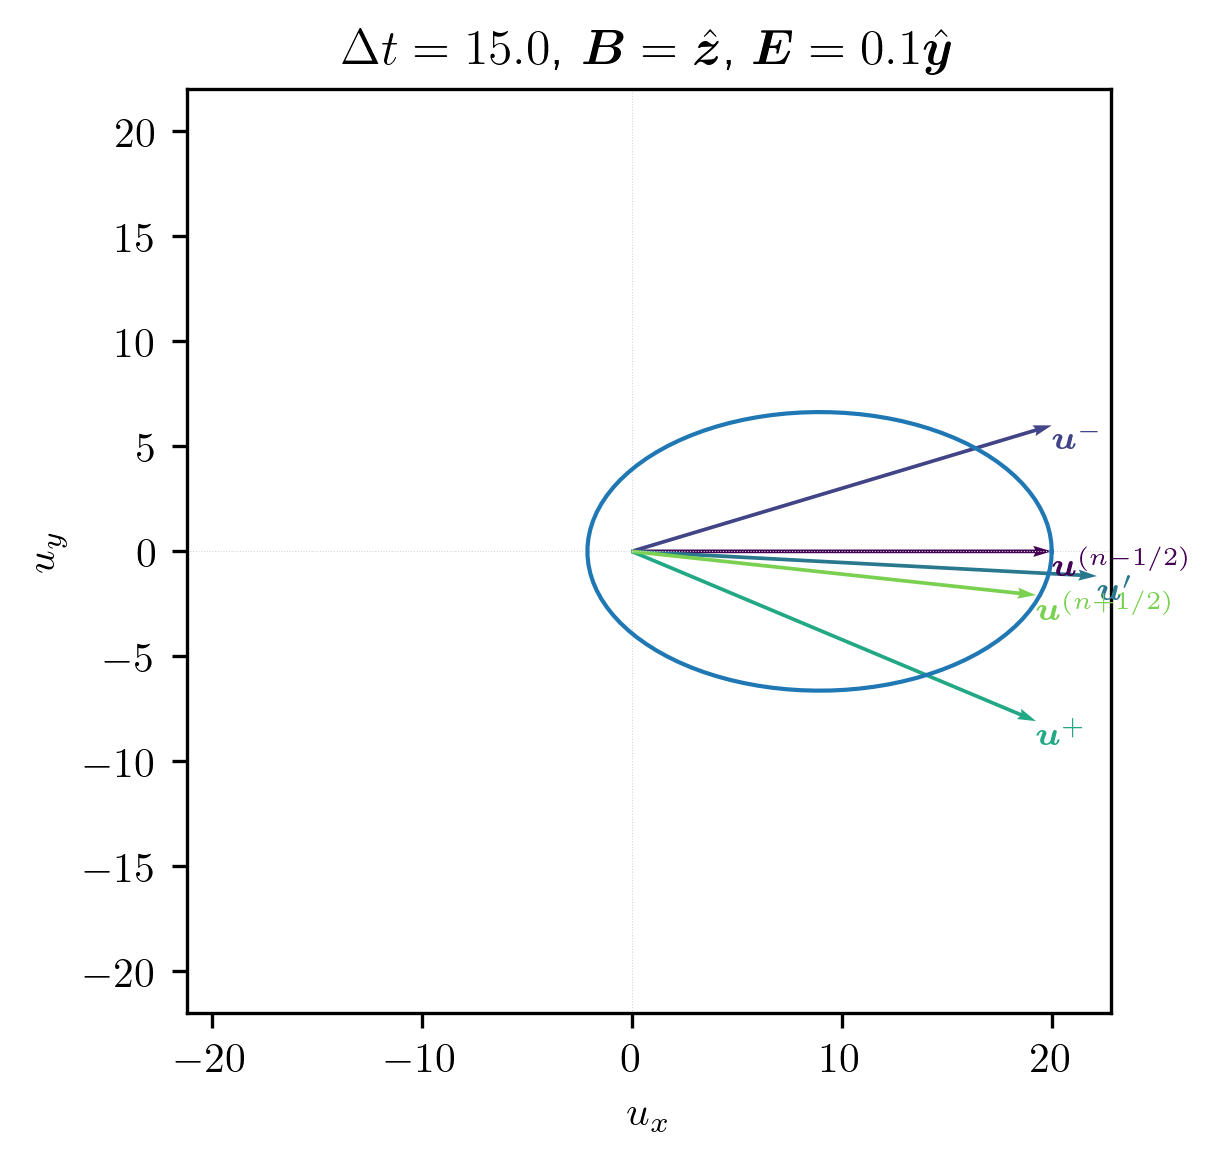

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.axvline(0, color="lightgray", lw=0.25, ls=":")
ax.axhline(0, color="lightgray", lw=0.25, ls=":")

quiver_kwargs = {
    "angles": "xy",
    "scale_units": "xy",
    "scale": 1,
    "width": 4e-3,
}
text_kwargs = {
    "fontsize": 8,
    "ha": "left",
    "va": "top",
}

# ax.add_artist(mpatches.Circle((vdrift, 0), u0[0], alpha=0.5, fill=False, color="C0"))

phase = np.linspace(0, 2 * np.pi, 100)
ax.plot(
    ux_th,
    uy_th,
    color="C0",
    lw=1,
)

for i, (u, q) in enumerate(
    zip(
        [u_init, u_e, u1, u2, uf],
        [
            r"$\bm{u}^{(n-1/2)}$",
            r"$\bm{u}^{-}$",
            r"$\bm{u}'$",
            r"$\bm{u}^+$",
            r"$\bm{u}^{(n+1/2)}$",
        ],
    )
):
    color = plt.cm.viridis(i / 5)
    ax.quiver(0, 0, u[0], u[1], color=color, **quiver_kwargs)
    ax.text(
        u[0] + 0.0025,
        u[1] - 0.0025,
        q,
        color=color,
        **text_kwargs,
    )

ax.set_xlabel(r"$u_x$")
ax.set_ylabel(r"$u_y$")
ax.set_xlim(-1.1 * ux_init + vx_drift, 1.1 * ux_init + vx_drift)
ax.set_ylim(-1.1 * ux_init, 1.1 * ux_init)
ax.set_aspect("equal")
ax.set_title(
    rf"$\Delta t = {dt:.1f}$, $\bm{{B}}=\hat{{\bm{{z}}}}$, $\bm{{E}}=0.1\hat{{\bm{{y}}}}$"
)

# plt.savefig("boris-full.png")